In [23]:
!pip install minisom
import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
df = pd.read_csv('data.csv', sep=',')
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [28]:
df = df.set_index('Unnamed: 0')
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
Unnamed: 0,,,,,,,,,,,,,,,,
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man


In [98]:
df['mode'].value_counts()

1    1235
0     782
Name: mode, dtype: int64

In [99]:
# Selecionando as colunas relevantes para o mapa de Kohonen.
colunas_som = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'loudness', 'speechiness', 'valence']
df1 = df[colunas_som].values

In [100]:
# padronização dos dados.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

In [174]:
# defina os hiperparâmetros do SOM.
dim_saida = 15
epocas = 1000
learning_rate = 0.5
sigma = 10

In [175]:
# treinando e inicilizando.
som = MiniSom(dim_saida, dim_saida,scaled_data.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, epocas)

In [176]:
# neuronio vencedor.
neuron_labels = np.array([som.winner(dado) for dado in scaled_data])

# numero de clusters.
unique_neurons = set(tuple(neuron) for neuron in neuron_labels)
numero_de_clusters = len(unique_neurons)
print(f'Número de Clusters: {numero_de_clusters}')

Número de Clusters: 195


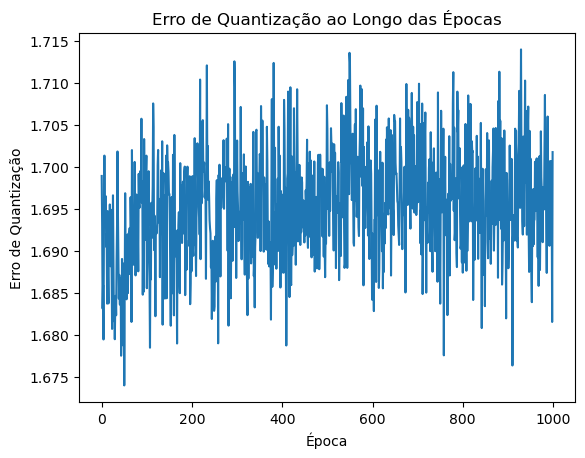

In [40]:
# avaliando erro de quantização para obter o melhor resultado
quantization_error = []
for epoca in range(epocas):
    np.random.shuffle(scaled_data)
    som.train_batch(scaled_data, len(scaled_data), verbose=False)
    
    q_error = som.quantization_error(scaled_data)
    quantization_error.append(q_error)

# visualização erro de quantização ao longo das épocas
plt.plot(range(len(quantization_error)), quantization_error)
plt.xlabel('Época')
plt.ylabel('Erro de Quantização')
plt.title('Erro de Quantização ao Longo das Épocas')
plt.show()

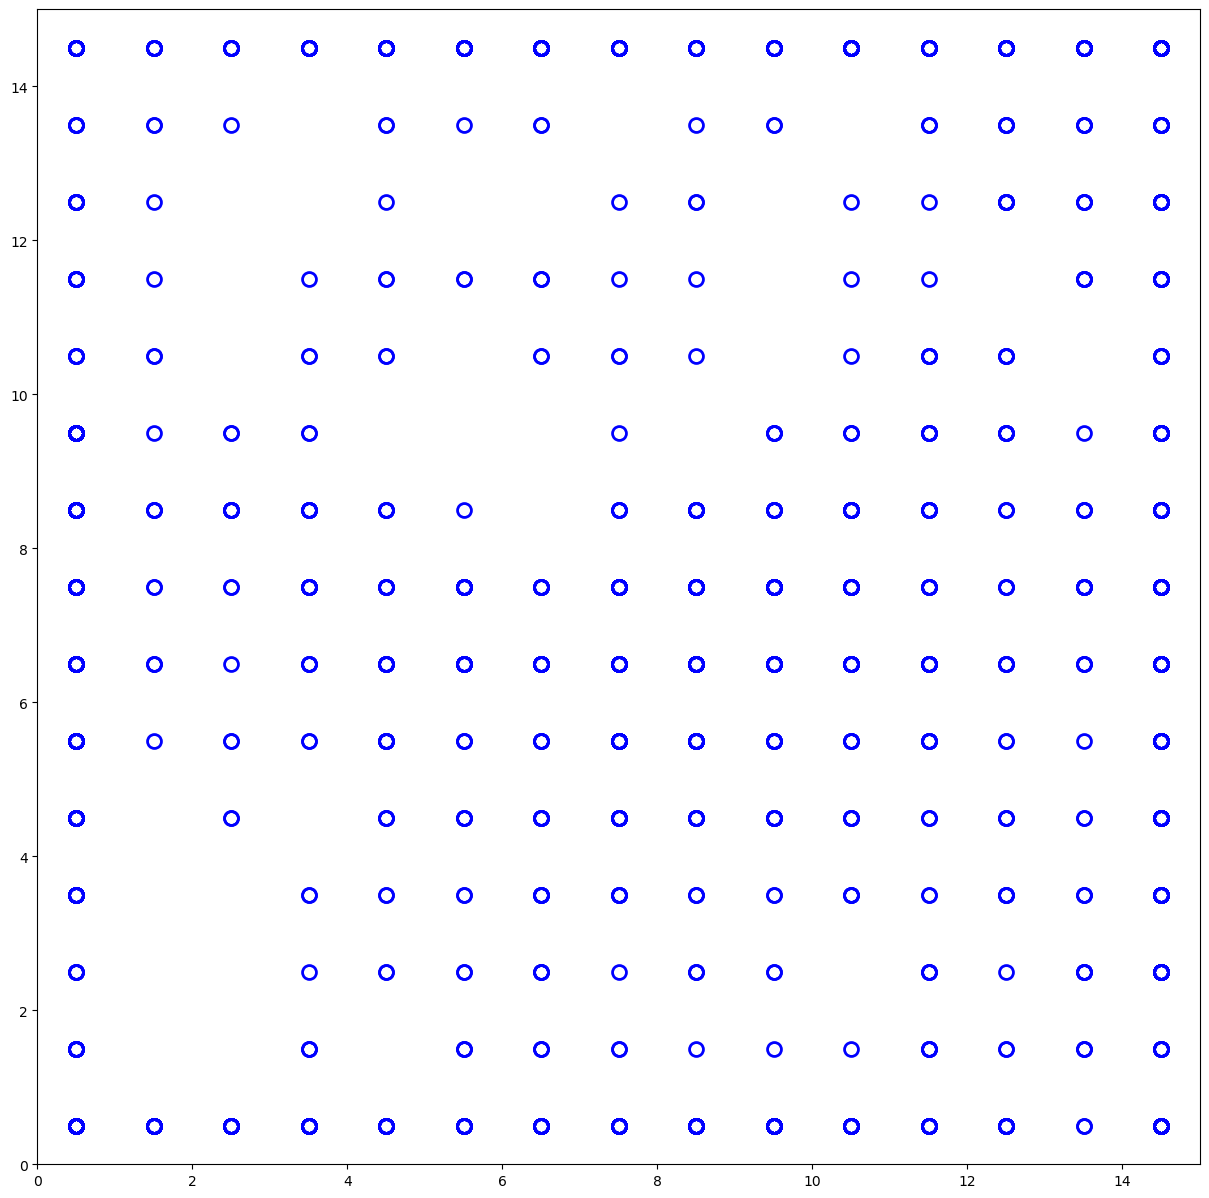

In [177]:
# Visualizando o mapa de Kohonen
plt.figure(figsize=(dim_saida, dim_saida))
for i, x in enumerate(scaled_data):
    winner = som.winner(x)
    plt.plot(winner[0]+0.5, winner[1]+0.5, 'o', markerfacecolor='None', markersize=10, markeredgewidth=2, markeredgecolor='b')
plt.axis([0, dim_saida, 0, dim_saida])
plt.show()

In [192]:
# criando um dataframe novo para visualizar os agrupamentos dos dados.
df_cluster11 = df.drop(['song_title','artist'], axis = 1)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,Cluster
Unnamed: 0,,,,,,,,,,,,,,,
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,5
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,180
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,215
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,91
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,155


In [195]:
# Crie uma nova coluna com os números dos clusters no DataFrame original
df_cluster11['Cluster'] = [label[0] * dim_saida + label[1] + 1 for label in neuron_labels]
# Agregar os dados por cluster e gerar estatísticas descritivas
cluster_stats = df_cluster11.groupby('Cluster')[df_cluster11.columns].agg(['mean', 'count'])

print(cluster_stats)

        acousticness       danceability          duration_ms          energy  \
                mean count         mean count           mean count      mean   
Cluster                                                                        
1           0.206317    97     0.682753    97  238461.876289    97  0.576680   
2           0.415141    10     0.734500    10  203658.600000    10  0.584800   
3           0.471200     5     0.728600     5  194937.000000     5  0.593000   
4           0.491882    17     0.749118    17  215871.176471    17  0.508059   
5           0.540097    31     0.750161    31  208418.774194    31  0.420903   
...              ...   ...          ...   ...            ...   ...       ...   
221         0.134931     8     0.364375     8  265996.375000     8  0.585625   
222         0.115906    10     0.415400    10  224540.100000    10  0.542100   
223         0.306308    12     0.417833    12  246031.250000    12  0.550000   
224         0.230531     9     0.430333 

In [197]:
df_cluster11.Cluster.value_counts()  #clusters separados

225    123
1       97
211     94
10      63
9       41
      ... 
89       1
48       1
162      1
177      1
132      1
Name: Cluster, Length: 195, dtype: int64

In [198]:
#Erro de Quantização
def quantization_error(som, data):
    qe = som.quantization_error(data)
    return qe

qe = quantization_error(som, scaled_data)
print(f"Erro de Quantização (QE): {qe}")

Erro de Quantização (QE): 1.8334501153903842


In [199]:
def topographic_error(som, data):
    te = 0
    for i, x in enumerate(data):
        w = som.winner(x)  # Encontre o neurônio vencedor para o dado atual
        is_topographic = True
        for j, x2 in enumerate(data):
            if i != j:
                w2 = som.winner(x2)  # Encontre o neurônio vencedor para outro dado
                if np.linalg.norm(np.array(w) - np.array(w2)) > 1:  # Verifique a distância entre os neurônios vencedores
                    is_topographic = False
                    break
        if not is_topographic:
            te += 1
    te /= len(data)  # Divida pela quantidade de dados para obter a média
    return te

te = topographic_error(som, scaled_data)
print(f"Erro Topográfico (TE): {te}")

Erro Topográfico (TE): 1.0
